# Abrindo

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount("/content/drive", force_remount=True)
PATH = "/content/drive/My Drive/UNITS/Ricerca/BerriesPeru/"


Mounted at /content/drive


In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import mean_absolute_error

import math
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [ ]:
arquivo_xlsx = PATH+'Data_SSC_V3.xlsx'
dados = pd.read_excel(arquivo_xlsx, header=1, sheet_name=1)

novo_rotulo = []
for coluna in dados.columns:
    if isinstance(coluna, float):
        novo_rotulo.append(str(int(coluna)+1))
    else:
        novo_rotulo.append(coluna)

dados.columns = novo_rotulo
dados


,Crop year,Variety,Maturation stage,901,906,910,914,918,922,926,...,1678,1680,1683,1686,1689,1692,1695,1698,1701,SSC (°Brix)
0,2022,Atlas,Unripe,0.541659,0.546124,0.546535,0.553345,0.556245,0.564285,0.572635,...,1.045500,1.027749,1.009226,0.994546,0.994619,0.990464,0.996263,1.020882,1.010483,7.5
1,2022,Atlas,Unripe,0.429442,0.431386,0.435771,0.436754,0.440436,0.445749,0.454582,...,0.851639,0.827716,0.815500,0.800377,0.792544,0.799732,0.798587,0.796900,0.807886,6.9
2,2022,Atlas,Unripe,0.439619,0.444826,0.444238,0.451112,0.453555,0.461264,0.469420,...,0.917319,0.891174,0.881468,0.869190,0.862365,0.871390,0.856666,0.871200,0.888992,7.6
3,2022,Atlas,Unripe,0.478739,0.482260,0.484237,0.485409,0.490453,0.497408,0.503412,...,0.928310,0.899950,0.887233,0.881189,0.875056,0.872480,0.880405,0.893851,0.889627,7.5
4,2022,Atlas,Unripe,0.404749,0.409045,0.410361,0.413752,0.416207,0.424500,0.431582,...,0.865379,0.839488,0.823880,0.814814,0.814734,0.807921,0.815886,0.825149,0.819888,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2023,Biloxi,Ripe,0.847069,0.840124,0.842483,0.844407,0.843068,0.844627,0.853934,...,1.236759,1.217637,1.221478,1.204317,1.200632,1.199235,1.199378,1.209408,1.209568,12.7
716,2023,Biloxi,Ripe,0.839847,0.831897,0.836546,0.832896,0.837316,0.841620,0.847292,...,1.277554,1.267409,1.253575,1.244753,1.241555,1.227515,1.222318,1.215290,1.232391,13.3
717,2023,Biloxi,Ripe,0.744560,0.752556,0.754471,0.753611,0.756066,0.757160,0.763187,...,1.147835,1.136795,1.129648,1.122322,1.117028,1.116509,1.120623,1.099030,1.126653,12.6
718,2023,Biloxi,Ripe,0.655227,0.655337,0.655579,0.659973,0.663973,0.661511,0.673108,...,1.118742,1.105023,1.091972,1.079700,1.071714,1.080666,1.072385,1.083153,1.084967,11.9


In [ ]:
dataset_serie = pd.DataFrame(dados.reset_index())
dataset_serie = pd.melt(dataset_serie, id_vars=["index", "Crop year", "Variety", "Maturation stage", "SSC (°Brix)"]) #converter para o formato do lineplot (seaborn)
dataset_serie

figure(figsize=(30, 4), dpi=120)
ax = sns.lineplot(x='variable', y="value",data=dataset_serie)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
dataset_serie = pd.DataFrame(dados.reset_index())
dataset_serie = pd.melt(dataset_serie, id_vars=["index", "Crop year", "Variety", "Maturation stage", "SSC (°Brix)"]) #converter para o formato do lineplot (seaborn)
dataset_serie

figure(figsize=(30, 4), dpi=120)
ax = sns.lineplot(x='variable', y="value", hue="Crop year",data=dataset_serie)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# EDA

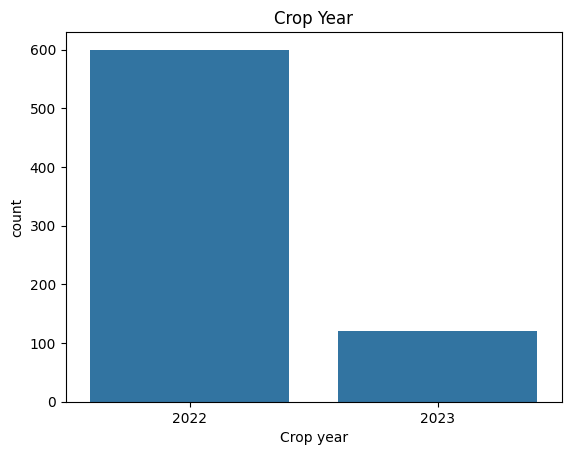

In [ ]:
sns.countplot(x = 'Crop year', data = dados)
plt.title("Crop Year")
plt.show()

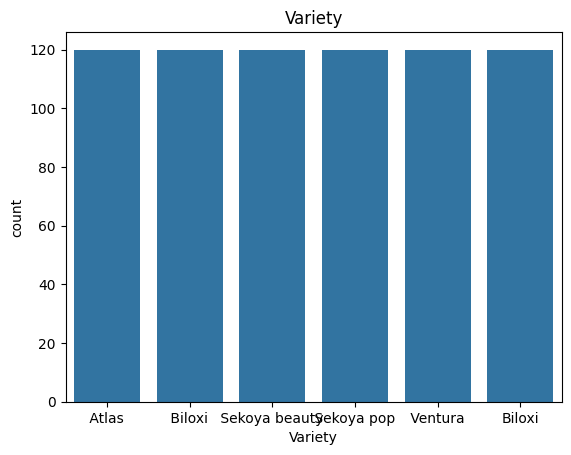

In [ ]:
sns.countplot(x = 'Variety', data = dados)
plt.title("Variety")
plt.show()

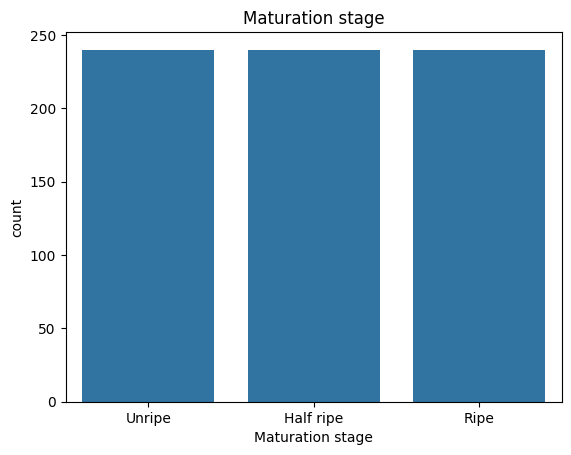

In [ ]:
sns.countplot(x = 'Maturation stage', data = dados)
plt.title("Maturation stage")
plt.show()

<ipython-input-9-0be32cfc5cc4>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


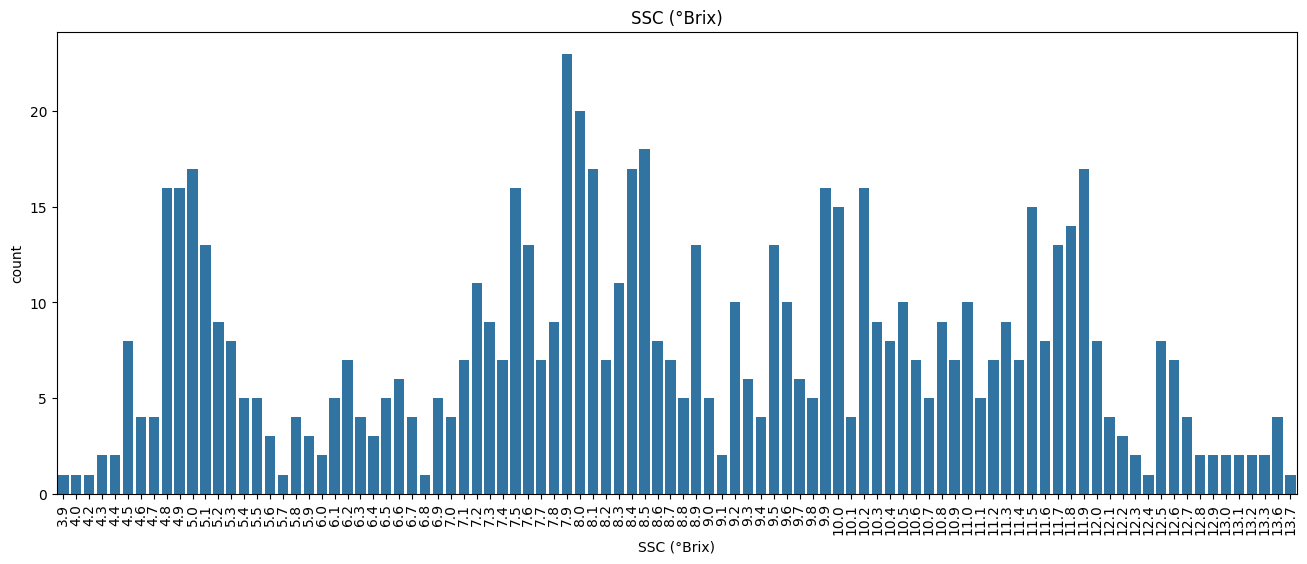

In [ ]:
plt.figure(figsize=(16, 6))

ax = sns.countplot(x = 'SSC (°Brix)', data = dados)
plt.title("SSC (°Brix)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

#PLS

In [ ]:
import math
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

import numpy as np

def optimise_pls_cv(X, y, n_comp, plot_components=False):

    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''

    mse = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i)

        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)

        mse.append(mean_squared_error(y, y_cv))

        comp = 100*(i+1)/n_comp
        # Trick to update status on the same line
        #print("Completed",comp)
    #print("\n")

    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    print("\n")

    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)

        plt.show()

    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)

    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('RMSE calib: %5.3f' % math.sqrt(mse_c))
    print('RMSE CV: %5.3f' % math.sqrt(mse_cv))

    if plot_components is True:
      # Plot regression and figures of merit
      rangey = max(y) - min(y)
      rangex = max(y_c) - min(y_c)

      # Fit a line to the CV vs response
      z = np.polyfit(y, y_c, 1)
      with plt.style.context(('ggplot')):
          fig, ax = plt.subplots(figsize=(9, 5))
          ax.scatter(y_c, y, c='red', edgecolors='k')
          #Plot the best fit line
          ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
          #Plot the ideal 1:1 line
          ax.plot(y, y, color='green', linewidth=1)
          plt.title('$R^{2}$ (CV): '+str(score_cv))
          plt.xlabel('Predicted $^{\circ}$Brix')
          plt.ylabel('Measured $^{\circ}$Brix')

          plt.show()

    return msemin+1

Suggested number of components:  19




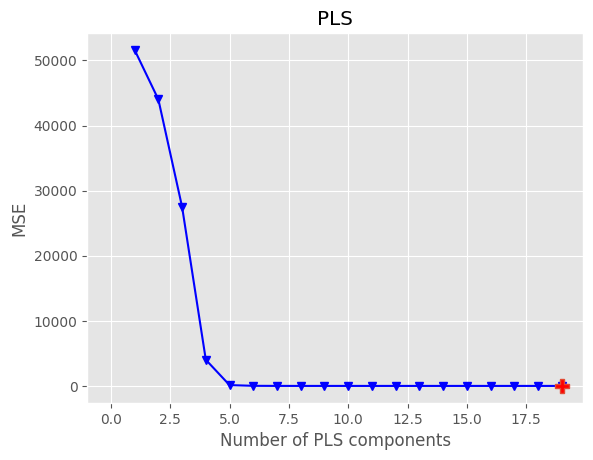

R2 calib: 1.000
R2 CV: 1.000
RMSE calib: 0.007
RMSE CV: 0.011


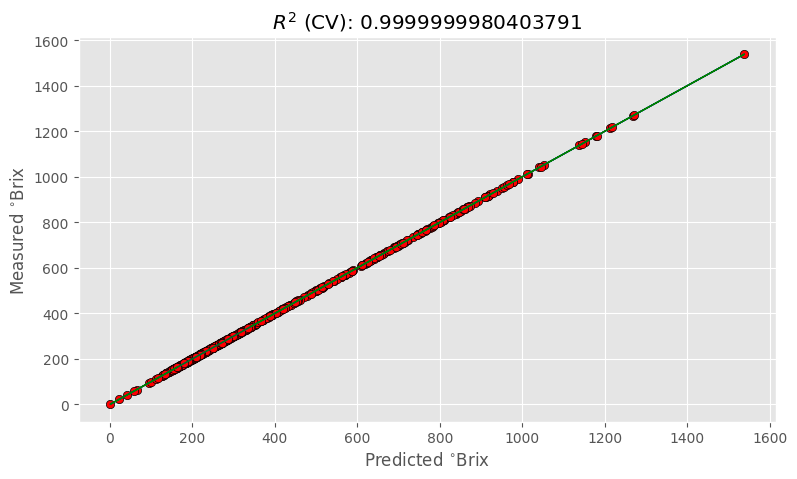

19

In [ ]:
arquivo_xlsx = PATH+'Data_firmness_V3.xlsx'
target = 'Firmness (gf)'

dados = pd.read_excel(arquivo_xlsx, header=1, sheet_name=1)

novo_rotulo = []
for coluna in dados.columns:
    if isinstance(coluna, float):
        novo_rotulo.append(str(int(coluna)+1))
    else:
        novo_rotulo.append(coluna)

dados.columns = novo_rotulo
dados


optimise_pls_cv(dados.drop(["Crop year", "Variety", "Maturation stage"], axis=1),dados[target], 20, plot_components=True)

# Outlier Removal (Isolation Forest)

In [ ]:
from sklearn.ensemble import IsolationForest

def outlier_removal(data, perc, seed):
  if perc==0:
    return(data)
  iso = IsolationForest(contamination=perc, random_state=seed)
  yhat = iso.fit_predict(dados.iloc[:,3:231])

  mask = yhat != -1
  return data.iloc[mask, :]

# Induzindo um modelo

## Run RF

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

def run_RF(dados, target):
  #y_train = pd.DataFrame(dados[dados['Crop year']==2022][target])
  #x_train = pd.DataFrame(dados[dados['Crop year']==2022].iloc[:,3:231])

  #y_test = pd.DataFrame(dados[dados['Crop year']==2023][target])
  #x_test = pd.DataFrame(dados[dados['Crop year']==2023].iloc[:,3:231])

  y, X =  shuffle(pd.DataFrame(dados[target]),
                  pd.DataFrame(dados.iloc[:,3:231]), random_state=42)
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


  model = RandomForestRegressor(random_state=2, n_estimators=50)
  model.fit(x_train, y_train[target].values.ravel())
  y_pred = model.predict(x_train)
  mean_r2 = r2_score(y_train[target].values.ravel(), y_pred)
  mean_rmse = mean_squared_error(y_train[target].values.ravel(), y_pred, squared=False)
  mean_mae = mean_absolute_error(y_train[target].values.ravel(), y_pred)

  print('CAL - R-squared (R^2): %.3f' % mean_r2)
  print('CAL - Root Mean Squared Error (RMSE): %.3f' % mean_rmse)
  print('CAL - MAE: %.3f' % mean_mae)

  result_r2 = []
  result_rmse = []
  result_mae = []
  config = "RF"
  for seed in range(3,4):
    model = RandomForestRegressor(random_state=seed, n_estimators=50)
    model.fit(x_train, y_train[target])
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)  # Calculate R-squared
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    mae = mean_absolute_error(y_test, y_pred)

    result_r2.append(r2)
    result_rmse.append(rmse)
    result_mae.append(mae)

    print('seed', seed)
    print('r2', r2)

  print(y_test.values.ravel().shape)
  print(len(y_pred))
  pd.DataFrame({"Y Measured": y_test.values.ravel().T, "Y Predicted":y_pred}).to_csv(PATH+"Ys_iForest_"+target+".csv")

  mean_r2 = sum(result_r2) / len(result_r2)
  mean_rmse = sum(result_rmse) / len(result_rmse)
  mean_mae = sum(result_mae) / len(result_mae)

  print('TEST - R-squared (R^2): %.3f' % mean_r2)
  print('TEST - Root Mean Squared Error (RMSE): %.3f' % mean_rmse)
  print('TEST - MAE: %.3f' % mean_mae)

  result = pd.DataFrame({'R-squared': result_r2, 'RMSE': result_rmse, 'MAE': result_mae})
  result['Algorithm'] = config
  return(result)
#print(run_RF(dados, 'SSC (°Brix)'))

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def run_SVM(dados, target):
  y, X =  shuffle(pd.DataFrame(dados[target]),
                  pd.DataFrame(dados.iloc[:,3:231]), random_state=42)
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  print(x_train.shape, y_train.shape)
  print(x_test.shape, y_test.shape)

  gamma = [0.1, 0.01, 0.02, 0.03, 0.05, 0.001, 0.002]
  degree = [2,3]
  #gamma = [0.1]
  #degree = [2]
  result_r2 = []
  result_rmse = []
  result_mae = []
  config = []
  for g in gamma:
    for d in degree:
      # Create an SVC classifier
      svc = SVR(kernel="poly", degree=d, gamma=g)
      svc.fit(x_train, y_train.values.ravel())
      y_pred = svc.predict(x_test)

      config.append("SVM_d_"+str(d)+"_g_"+str(g))
      r2 = r2_score(y_test, y_pred)  # Calculate R-squared
      rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
      mae = mean_absolute_error(y_test, y_pred)

      result_r2.append(r2)
      result_rmse.append(rmse)
      result_mae.append(mae)

  mean_r2 = sum(result_r2) / len(result_r2)
  mean_rmse = sum(result_rmse) / len(result_rmse)
  mean_mae = sum(result_mae) / len(result_mae)

  print('R-squared (R^2): %.3f' % mean_r2)
  print('Root Mean Squared Error (RMSE): %.3f' % mean_rmse)

  result = pd.DataFrame({'R-squared': result_r2, 'RMSE': result_rmse, 'MAE': result_mae})
  result['Algorithm'] = config
  return(result)

#print(run_SVM(dados, 'SSC (°Brix)'))

# Batch sem PLS

In [ ]:
def run_experiments(dataset, target, preprocessing):
  df1 = run_RF(dataset, target)
  df2 = run_SVM(dataset, target)
  final = pd.concat([df1, df2], axis=0)
  final["Preprocessing"] = preprocessing
  return(final)

arquivos = [PATH+'Data_SSC_V3.xlsx', PATH+'Data_firmness_V3.xlsx', PATH+'Data_TA_V3.xlsx']
targets = ['SSC (°Brix)', 'Firmness (gf)', 'Titratable acidity (%)']

perc_isolation = [0.00, 0.01, 0.05, 0.10]
seed_isolation = [1, 14, 16, 22, 30, 42]

#perc_isolation = [0.00]
#seed_isolation = [1]

for idx, arquivo_xlsx in enumerate(arquivos):
  #arquivo_xlsx = PATH+'Data_SSC_V3.xlsx'
  sheets = pd.read_excel(arquivo_xlsx, None);

  print("Preprocessing:",sheets.keys())

  #target = 'SSC (°Brix)'
  target = targets[idx]
  print("Target", target)

  final_results = pd.DataFrame()
  for sheet in list(sheets.keys()):
    if(sheet != "Info"):
      print("**************" + sheet)
      for perc in perc_isolation:
        print("... isolation:", perc)
        dados = pd.read_excel(arquivo_xlsx, header=1, sheet_name=sheet)
        for seed in seed_isolation:
          print(". seed:", seed)
          dados_outlier_removed = outlier_removal(dados, perc, seed)
          experiments_result = run_experiments(dados_outlier_removed, target, sheet)
          params_df = pd.DataFrame({'perc_isoF': [perc] * len(experiments_result),
                                    'seed_isoF': [seed] * len(experiments_result)})
          experiments_result.reset_index(drop=True, inplace=True)
          params_df.reset_index(drop=True, inplace=True)
          result_with_params = pd.concat([params_df, experiments_result], axis=1)
          final_results = pd.concat([final_results, result_with_params], axis=0)
          #print(final_results.head(5))




  final_results = np.round(final_results,4)
  final_results.sort_values(["R-squared"], ascending=False).to_excel(PATH+"/final_results_original_V4_"+target+".xlsx", header=True)



In [ ]:
final_results

In [ ]:
g = sns.FacetGrid(final_results, col="Preprocessing", col_wrap=3)
g.map(sns.boxplot, "RMSE", "Algorithm")
g.add_legend()

In [ ]:
g = sns.FacetGrid(final_results, col="Preprocessing", col_wrap=3)
g.map(sns.boxplot, "R-squared", "Algorithm", color='r')
g.add_legend()

# Batch com PLS

In [ ]:
from sklearn.svm import SVR

arquivo_xlsx = PATH+'Data_SSC_V3.xlsx'
dados = pd.read_excel(arquivo_xlsx, header=1, sheet_name=1)

novo_rotulo = []
for coluna in dados.columns:
    if isinstance(coluna, float):
        novo_rotulo.append(str(int(coluna)+1))
    else:
        novo_rotulo.append(coluna)

dados.columns = novo_rotulo
dados


In [ ]:
def get_pls_cv (X_train, y_train, X_test, y_test, qtd_LV):
  pls = PLSRegression(n_components=qtd_LV)
  pls.fit(X_train, y_train)

  X_train_transformed = pls.transform(X_train)
  X_test_transformed = pls.transform(X_test)

  return(X_train_transformed, X_test_transformed)


### Run RF PLS

In [ ]:
def run_RF_PLS(dados, target):
  y, X =  shuffle(pd.DataFrame(dados[target]),
                  pd.DataFrame(dados.iloc[:,3:231]), random_state=42)

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  best_LV = optimise_pls_cv(X, y.values.ravel(), 20, plot_components=False)

  x_train_pls, x_test_pls = get_pls_cv(x_train, y_train, x_test, y_test, best_LV)



  print(x_train_pls.shape, y_train.shape)
  print(x_test_pls.shape, y_test.shape)


  model = RandomForestRegressor(random_state=1, n_estimators=50)
  model.fit(x_train_pls, y_train[target].values.ravel())
  y_pred = model.predict(x_train_pls)
  mean_r2 = r2_score(y_train[target].values.ravel(), y_pred)
  mean_rmse = mean_squared_error(y_train[target].values.ravel(), y_pred, squared=False)
  mean_mae = mean_absolute_error(y_train[target].values.ravel(), y_pred)

  print('CAL - R-squared (R^2): %.3f' % mean_r2)
  print('CAL - Root Mean Squared Error (RMSE): %.3f' % mean_rmse)
  print('CAL - MAE: %.3f' % mean_mae)


  result_r2 = []
  result_rmse = []
  result_mae = []
  #for seed in range(1,10):
  for seed in range(3,4):
    model = RandomForestRegressor(random_state=seed, n_estimators=50)
    model.fit(x_train_pls, y_train[target].values.ravel())
    y_pred = model.predict(x_test_pls)

    print('>>>>>>>>>>>>>', len(y_pred))

    r2 = r2_score(y_test, y_pred)  # Calculate R-squared
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    mae = mean_absolute_error(y_test, y_pred)

    result_r2.append(r2)
    result_rmse.append(rmse)
    result_mae.append(mae)

    print('seed', seed)
    print('r2', r2)


  print(y_test.values.ravel().shape)
  print(len(y_pred))
  pd.DataFrame({"Y Measured": y_test.values.ravel().T, "Y Predicted":y_pred}).to_csv(PATH+"Ys_PLS_iForest_"+target+".csv")

  mean_r2 = sum(result_r2) / len(result_r2)
  mean_rmse = sum(result_rmse) / len(result_rmse)
  mean_mae = sum(result_mae) / len(result_mae)

  print('TEST - R-squared (R^2): %.3f' % mean_r2)
  print('TEST - Root Mean Squared Error (RMSE): %.3f' % mean_rmse)
  print('TEST - MAE: %.3f' % mean_mae)


  result = pd.DataFrame({'R-squared': result_r2, 'RMSE': result_rmse, 'MAE': result_mae, "LV":best_LV})
  result['Algorithm'] = 'RF Regression'
  return(result)

#print(run_RF_PLS(dados, 'SSC (°Brix)'))

def run_SVM_PLS(dados, target):
  y, X =  shuffle(pd.DataFrame(dados[target]),
                  pd.DataFrame(dados.iloc[:,3:231]), random_state=42)
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  best_LV = optimise_pls_cv(X, y.values.ravel(), 20, plot_components=False)
  x_train_pls, x_test_pls = get_pls_cv(x_train, y_train, x_test, y_test, best_LV)

  print(x_train_pls.shape, y_train.shape)
  print(x_test_pls.shape, y_test.shape)

  gamma = [0.1, 0.01, 0.02, 0.03, 0.05, 0.001, 0.002]
  degree = [2,3]
  #gamma = [0.1]
  #degree = [2]
  result_r2 = []
  result_rmse = []
  result_mae = []
  config = []
  for g in gamma:
    for d in degree:
      # Create an SVC classifier
      svc = SVR(kernel="poly", degree=d, gamma=g)
      svc.fit(x_train_pls, y_train.values.ravel())
      y_pred = svc.predict(x_test_pls)

      config.append("SVM_d_"+str(d)+"_g_"+str(g))
      r2 = r2_score(y_test, y_pred)  # Calculate R-squared
      rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
      mae = mean_absolute_error(y_test, y_pred)

      result_r2.append(r2)
      result_rmse.append(rmse)
      result_mae.append(mae)


  mean_r2 = sum(result_r2) / len(result_r2)
  mean_rmse = sum(result_rmse) / len(result_rmse)
  mean_mae = sum(result_mae) / len(result_mae)


  print('R-squared (R^2): %.3f' % mean_r2)
  print('Root Mean Squared Error (RMSE): %.3f' % mean_rmse)

  result = pd.DataFrame({'R-squared': result_r2, 'RMSE': result_rmse, 'MAE': result_mae, "LV":best_LV})
  result['Algorithm'] = config
  return(result)

#print(run_SVM_PLS(dados, 'SSC (°Brix)'))

In [ ]:
def run_experiments_PLS(dataset, target, preprocessing):
  df1 = run_RF_PLS(dataset, target)
  df2 = run_SVM_PLS(dataset, target)
  final = pd.concat([df1, df2], axis=0)
  final["Preprocessing"] = preprocessing
  return(final)

arquivos = [PATH+'Data_SSC_V3.xlsx', PATH+'Data_firmness_V3.xlsx', PATH+'Data_TA_V3.xlsx']
targets = ['SSC (°Brix)', 'Firmness (gf)', 'Titratable acidity (%)']

perc_isolation = [0.00, 0.01, 0.05, 0.10]
seed_isolation = [1, 14, 22, 42]

for idx, arquivo_xlsx in enumerate(arquivos):
  #arquivo_xlsx = PATH+'Data_SSC_V3.xlsx'
  sheets = pd.read_excel(arquivo_xlsx, None);

  print("Preprocessing:",sheets.keys())

  #target = 'SSC (°Brix)'
  target = targets[idx]
  print("Target", target)

  final_results = pd.DataFrame()
  for sheet in list(sheets.keys()):
    if(sheet != "Info"):
      print("**************" + sheet)
      for perc in perc_isolation:
        print("... isolation:", perc)
        dados = pd.read_excel(arquivo_xlsx, header=1, sheet_name=sheet)
        for seed in seed_isolation:
          print(". seed:", seed)
          dados_outlier_removed = outlier_removal(dados, perc, seed)
          experiments_result = run_experiments_PLS(dados_outlier_removed, target, sheet)
          params_df = pd.DataFrame({'perc_isoF': [perc] * len(experiments_result),
                                    'seed_isoF': [seed] * len(experiments_result)})
          experiments_result.reset_index(drop=True, inplace=True)
          params_df.reset_index(drop=True, inplace=True)
          result_with_params = pd.concat([params_df, experiments_result], axis=1)
          final_results = pd.concat([final_results, result_with_params], axis=0)
          #print(final_results.head(5))

  print(final_results)
  final_results = np.round(final_results,4)
  final_results.sort_values(["R-squared"], ascending=False).to_excel(PATH+"/final_results_PLS_V4_"+target+".xlsx", header=True)





In [ ]:
final_results.sort_values(["RMSE"], ascending=True)

In [ ]:
final_results.sort_values(["R-squared"], ascending=False)

In [ ]:
final_results = np.round(final_results,2)
final_results.to_csv(PATH+"/final_results_pls_v3.csv", header=True)

# Visualizando Batch

In [ ]:
g = sns.FacetGrid(final_results, col="Preprocessing", col_wrap=3)
g.map(sns.boxplot, "RMSE", "Algorithm")
g.add_legend()

In [ ]:
g = sns.FacetGrid(final_results, col="Preprocessing", col_wrap=3)
g.map(sns.boxplot, "R-squared", "Algorithm", color='r')
g.add_legend()

#Gráficos e Testes para o Paper

## Com PLS

In [ ]:
def run_experiments_PLS(dataset, target, preprocessing):
  df1 = run_RF_PLS(dataset, target)
  #df2 = run_SVM_PLS(dataset, target)
  #final = pd.concat([df1, df2], axis=0)
  final = df1
  final["Preprocessing"] = preprocessing
  return(final)

arquivos = [PATH+'Data_SSC_V3.xlsx', PATH+'Data_firmness_V3.xlsx', PATH+'Data_TA_V3.xlsx']
sheet_list = ['Norm + SNV + 1st', 'Norm + 2nd', 'Norm data']
targets = ['SSC (°Brix)', 'Firmness (gf)', 'Titratable acidity (%)']

perc_isolation = [0.1, 0.05, 0.1]
seed_isolation = [42, 42, 1]

for idx, arquivo_xlsx in enumerate(arquivos):
  print("\n ********************* \nPreprocessing:",sheet_list[idx])
  target = targets[idx]
  print("Target", target)

  sheet = sheet_list[idx]

  perc = perc_isolation[idx]
  print("Perc:", perc)
  seed = seed_isolation[idx]
  print("Seed:", seed)
  dados = pd.read_excel(arquivo_xlsx, header=1, sheet_name=sheet)
  dados_outlier_removed = outlier_removal(dados, perc, seed)
  print("Total training size:"+(str)(dados_outlier_removed.shape[0]*0.7))
  experiments_result = run_experiments_PLS(dados_outlier_removed, target, sheet)


  #print("\n \nWITHOUT ISOLATION FOREST ==== ")

  #perc = 0
  #print("Perc:", perc)
  #seed = seed_isolation[idx]
  #print("Seed:", seed)
  #dados = pd.read_excel(arquivo_xlsx, header=1, sheet_name=sheet)
  #print("Total training size:"+(str)(dados.shape[0]*0.7))
  #experiments_result = run_experiments_PLS(dados, target, sheet)



 ********************* 
Preprocessing: Norm + SNV + 1st
Target SSC (°Brix)
Perc: 0.1
Seed: 42
Total training size:453.59999999999997
Suggested number of components:  11


R2 calib: 0.682
R2 CV: 0.648
RMSE calib: 1.345
RMSE CV: 1.415
(453, 11) (453, 1)
(195, 11) (195, 1)
CAL - R-squared (R^2): 0.958
CAL - Root Mean Squared Error (RMSE): 0.496
CAL - MAE: 0.378
>>>>>>>>>>>>> 195
seed 3
r2 0.7609541745907249
(195,)
195
TEST - R-squared (R^2): 0.761
TEST - Root Mean Squared Error (RMSE): 1.120
TEST - MAE: 0.855

 ********************* 
Preprocessing: Norm + 2nd
Target Firmness (gf)
Perc: 0.05
Seed: 42
Total training size:478.79999999999995
Suggested number of components:  11


R2 calib: 0.497
R2 CV: 0.461
RMSE calib: 165.472
RMSE CV: 171.309
(478, 11) (478, 1)
(206, 11) (206, 1)
CAL - R-squared (R^2): 0.915
CAL - Root Mean Squared Error (RMSE): 68.471
CAL - MAE: 44.716
>>>>>>>>>>>>> 206
seed 3
r2 0.572291220652956
(206,)
206
TEST - R-squared (R^2): 0.572
TEST - Root Mean Squared Error (RMS

## Sem PLS

In [ ]:
def run_experiments_paper(dataset, target, preprocessing):
  df1 = run_RF(dataset, target)
  final = df1
  final["Preprocessing"] = preprocessing
  return(final)

arquivos = [PATH+'Data_SSC_V3.xlsx', PATH+'Data_firmness_V3.xlsx', PATH+'Data_TA_V3.xlsx']
sheet_list = ['Norm + 1st', 'Norm + SNV + 1st', 'Norm + 2nd']
targets = ['SSC (°Brix)', 'Firmness (gf)', 'Titratable acidity (%)']

perc_isolation = [0.01, 0.10, 0.1]
seed_isolation = [1, 30, 1]

for idx, arquivo_xlsx in enumerate(arquivos):
  print("\n ********************* \nPreprocessing:",sheet_list[idx])
  target = targets[idx]
  print("Target", target)

  sheet = sheet_list[idx]

  perc = perc_isolation[idx]
  print("Perc:", perc)
  seed = seed_isolation[idx]
  print("Seed:", seed)
  dados = pd.read_excel(arquivo_xlsx, header=1, sheet_name=sheet)
  dados_outlier_removed = outlier_removal(dados, perc, seed)
  print("Total training size:"+(str)(dados_outlier_removed.shape[0]*0.7))
  experiments_result = run_experiments_paper(dados_outlier_removed, target, sheet)


  print("\n \nWITHOUT ISOLATION FOREST ==== ")

  #perc = 0
  #print("Perc:", perc)
  #seed = seed_isolation[idx]
  #print("Seed:", seed)
  #dados = pd.read_excel(arquivo_xlsx, header=1, sheet_name=sheet)
  #print("Total training size:"+(str)(dados.shape[0]*0.7))
  #experiments_result = run_experiments_paper(dados, target, sheet)



 ********************* 
Preprocessing: Norm + 1st
Target SSC (°Brix)
Perc: 0.01
Seed: 1
Total training size:498.4
CAL - R-squared (R^2): 0.952
CAL - Root Mean Squared Error (RMSE): 0.522
CAL - MAE: 0.374
seed 3
r2 0.756838689730958
(214,)
214
TEST - R-squared (R^2): 0.757
TEST - Root Mean Squared Error (RMSE): 1.170
TEST - MAE: 0.894

 
WITHOUT ISOLATION FOREST ==== 

 ********************* 
Preprocessing: Norm + SNV + 1st
Target Firmness (gf)
Perc: 0.1
Seed: 30
Total training size:453.59999999999997
CAL - R-squared (R^2): 0.913
CAL - Root Mean Squared Error (RMSE): 71.270
CAL - MAE: 45.408
seed 3
r2 0.5729499704301892
(195,)
195
TEST - R-squared (R^2): 0.573
TEST - Root Mean Squared Error (RMSE): 160.348
TEST - MAE: 106.477

 
WITHOUT ISOLATION FOREST ==== 

 ********************* 
Preprocessing: Norm + 2nd
Target Titratable acidity (%)
Perc: 0.1
Seed: 1
Total training size:172.2
CAL - R-squared (R^2): 0.974
CAL - Root Mean Squared Error (RMSE): 0.266
CAL - MAE: 0.169
seed 3
r2 0.807